In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,9)
plt.style.use('bmh')
import numpy as np
from sklearn.ensemble import *
import seaborn as sns


data = pd.read_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\QBElecWeatherDailyData.csv',
 index_col=0, parse_dates=True)

cols = data.columns

data.tail()

,value,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,
2022-02-25,2090.00,6.274167,2.117083,1024.291667,75.083333,5.198333
2022-02-26,1464.25,5.840417,1.968750,1028.250000,76.916667,5.150833
2022-02-27,1334.00,5.664583,0.662917,1023.250000,71.291667,5.717917
2022-02-28,1866.25,7.960833,5.926250,1022.083333,87.083333,4.866250
2022-03-01,457.50,6.386250,4.860000,1027.291667,90.041667,5.256667


In [2]:
data.describe()

,value,temp,dew_point,pressure,humidity,wind_speed
count,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000,5112.000000
mean,2536.693891,10.450578,7.288458,1014.369938,81.968717,4.415995
std,661.905452,5.351245,4.738956,11.007041,8.490008,1.797710
min,457.500000,-6.250000,-6.898750,968.916667,53.083333,0.822917
25%,2064.414250,6.446667,3.754896,1007.708333,75.833333,3.082708
50%,2522.123500,10.483125,7.496667,1015.437500,82.375000,4.195000
75%,3009.061000,14.720104,11.012292,1021.802083,88.458333,5.531458
max,4203.074000,26.625417,18.644167,1047.125000,100.000000,12.804583


In [3]:
from sklearn.model_selection import *

X = data.drop('value', axis=1)
y = data['value']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [4]:
X_train.shape, y_train.shape

((4089, 5), (4089,))

In [5]:
from xgboost import XGBRegressor

xgb = XGBRegressor(objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=1, 
    max_depth=7,
)

xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=50,
        verbose=False)

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

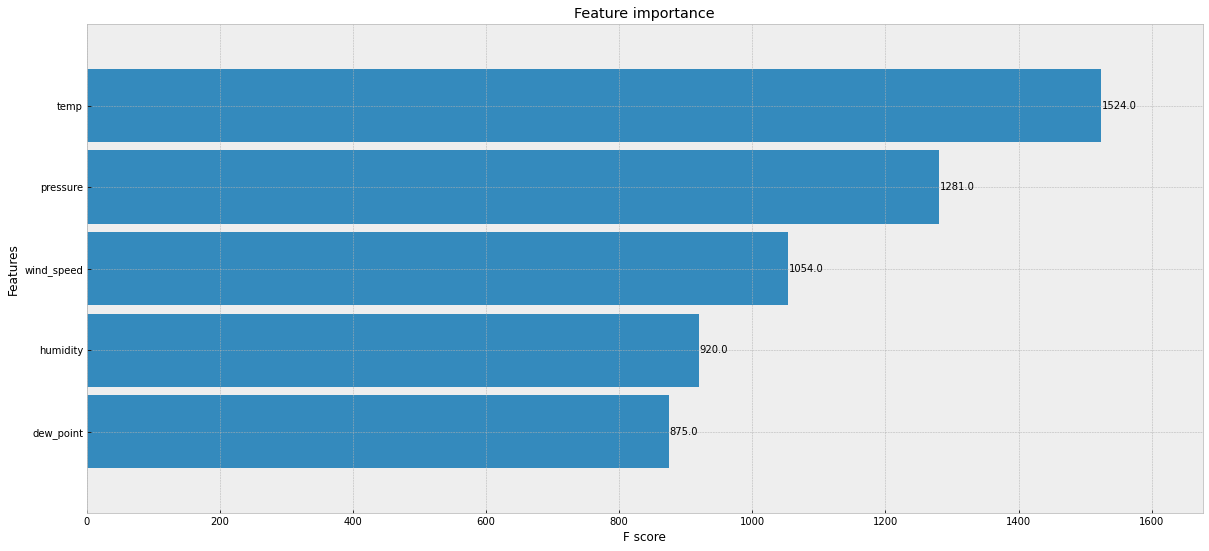

In [6]:
from xgboost import plot_importance

feature_importance = plot_importance(xgb, height=0.9)
feature_importance

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


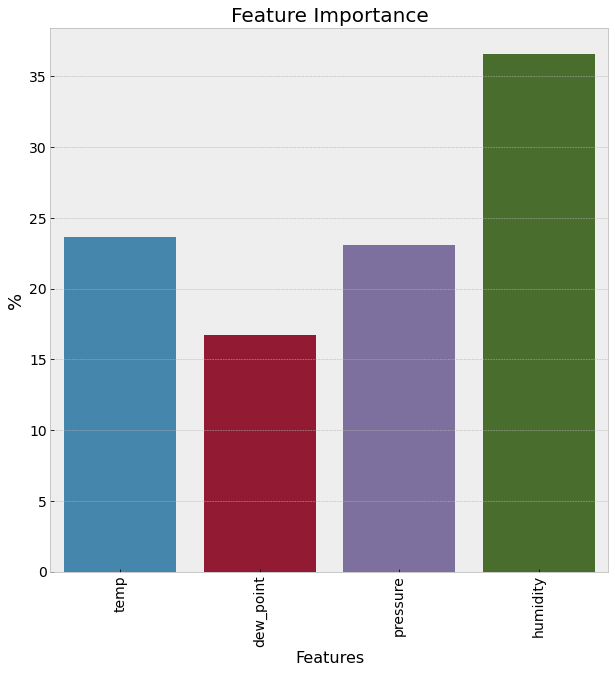

In [7]:
regr = RandomForestRegressor(max_depth=10, n_estimators = 1000)
regr.fit(data[cols[1:len(cols)-1]], data['value'])

importances = regr.feature_importances_*100

plt.figure(figsize=(10,10))
sns.barplot(cols[1:len(cols)-1],importances)
plt.xlabel('Features',fontsize=16, ha='center')
plt.ylabel('%',fontsize=18, ha='center')
plt.title('Feature Importance',fontsize=20, ha='center')
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=14)

In [8]:
data1 = pd.read_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\HUElecWeatherDailyData.csv',
 index_col=0, parse_dates=True)

cols1 = data1.columns

data1.tail()

,value,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,
2022-02-25,3794.0,6.274167,2.117083,1024.291667,75.083333,5.198333
2022-02-26,1894.0,5.840417,1.968750,1028.250000,76.916667,5.150833
2022-02-27,1626.0,5.664583,0.662917,1023.250000,71.291667,5.717917
2022-02-28,3679.0,7.960833,5.926250,1022.083333,87.083333,4.866250
2022-03-01,509.0,6.386250,4.860000,1027.291667,90.041667,5.256667


In [9]:
data1.describe()

,value,temp,dew_point,pressure,humidity,wind_speed
count,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000,4419.000000
mean,3017.201486,10.464189,7.242370,1014.520310,81.650901,4.403763
std,833.976336,5.337680,4.727393,10.971518,8.564454,1.806147
min,0.000000,-6.250000,-6.898750,972.791667,53.083333,0.822917
25%,2357.784000,6.441458,3.706875,1007.895833,75.479167,3.055000
50%,3087.439000,10.434167,7.388333,1015.541667,82.125000,4.162917
75%,3706.610500,14.723125,10.979792,1021.875000,88.166667,5.518125
max,5129.521000,26.625417,18.644167,1047.125000,100.000000,12.804583


In [10]:
from sklearn.model_selection import *

X = data1.drop('value', axis=1)
y = data1['value']

X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y,test_size=0.2)

In [11]:
xgb1 = XGBRegressor(objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=1, 
    max_depth=7,
)

xgb1.fit(X_train1, y_train1,
        eval_set=[(X_train1, y_train1), (X_test1, y_test1)],
        early_stopping_rounds=50,
        verbose=False)

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

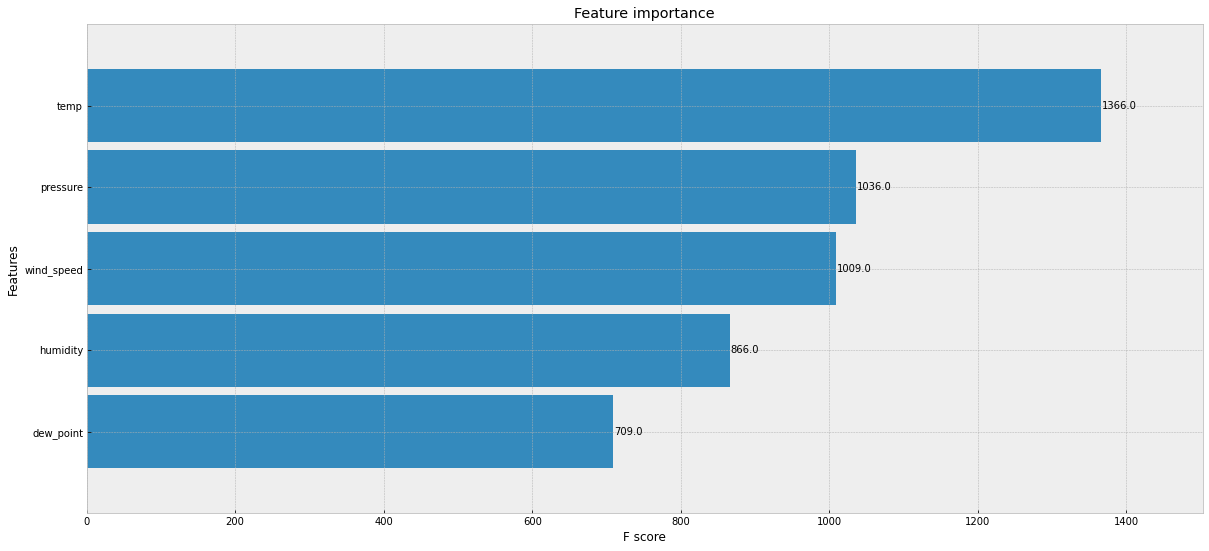

In [12]:
from xgboost import plot_importance

feature_importance = plot_importance(xgb1, height=0.9)
feature_importance

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


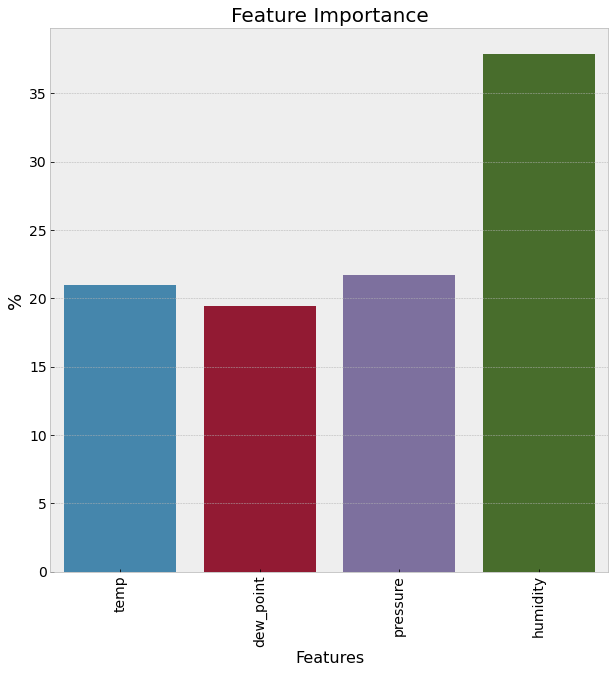

In [13]:
regr1 = RandomForestRegressor(max_depth=10, n_estimators = 1000)
regr1.fit(data1[cols1[1:len(cols1)-1]], data1['value'])

importances1 = regr1.feature_importances_*100

plt.figure(figsize=(10,10))
sns.barplot(cols1[1:len(cols1)-1],importances1)
plt.xlabel('Features',fontsize=16, ha='center')
plt.ylabel('%',fontsize=18, ha='center')
plt.title('Feature Importance',fontsize=20, ha='center')
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=14)

In [14]:
data2 = pd.read_csv('C:\\Users\\moham\\OneDrive - De Montfort University\\Final Project\\Master_Thesis\\Dataset\\GTWYElecWeatherDailyData.csv',
 index_col=0, parse_dates=True)

cols2 = data2.columns

data2.tail()

,value,temp,dew_point,pressure,humidity,wind_speed
Datetime,,,,,,
2022-02-24,2747.04,5.173333,1.981667,1008.750000,80.208333,7.111667
2022-02-25,2469.20,6.274167,2.117083,1024.291667,75.083333,5.198333
2022-02-26,1410.44,5.840417,1.968750,1028.250000,76.916667,5.150833
2022-02-27,1393.84,5.664583,0.662917,1023.250000,71.291667,5.717917
2022-02-28,496.56,7.960833,5.926250,1022.083333,87.083333,4.866250


In [15]:
data2.describe()

,value,temp,dew_point,pressure,humidity,wind_speed
count,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000,5046.000000
mean,3118.024048,10.488704,7.329314,1014.433206,81.992857,4.409243
std,1177.465872,5.362652,4.741149,10.974983,8.514411,1.794714
min,0.000000,-6.250000,-6.898750,972.791667,53.083333,0.822917
25%,2161.574500,6.466562,3.798958,1007.833333,75.833333,3.077500
50%,3004.408000,10.553542,7.568750,1015.479167,82.458333,4.186667
75%,4134.833250,14.748437,11.052083,1021.833333,88.531250,5.525833
max,5749.264000,26.625417,18.644167,1047.125000,100.000000,12.804583


In [16]:
from sklearn.model_selection import *

X = data2.drop('value', axis=1)
y = data2['value']

X_train2,X_test2,y_train2,y_test2 = train_test_split(X,y,test_size=0.2)

In [17]:
xgb2 = XGBRegressor(objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.1,
    subsample=0.5,
    colsample_bytree=1, 
    max_depth=7,
)

xgb2.fit(X_train2, y_train2,
        eval_set=[(X_train2, y_train2), (X_test2, y_test2)],
        early_stopping_rounds=50,
        verbose=False)

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

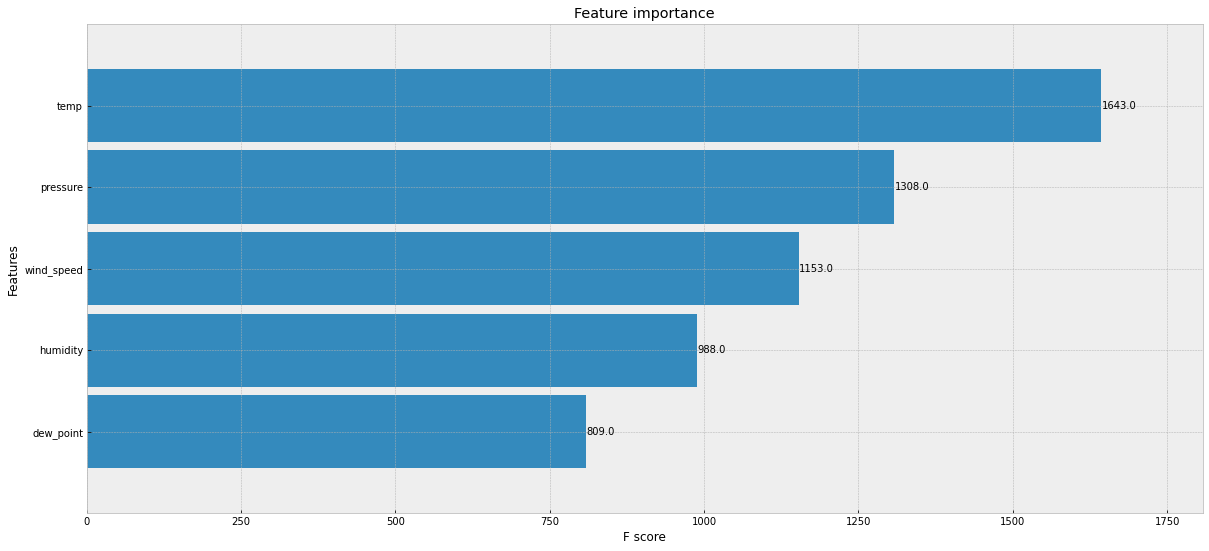

In [18]:
from xgboost import plot_importance

feature_importance = plot_importance(xgb2, height=0.9)
feature_importance

C:\Users\moham\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


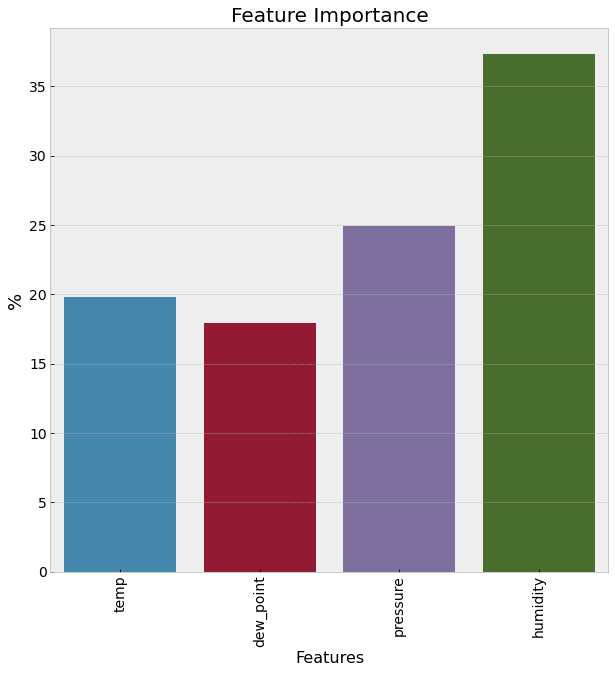

In [19]:
regr2 = RandomForestRegressor(max_depth=10, n_estimators = 1000)
regr2.fit(data2[cols2[1:len(cols2)-1]], data2['value'])

importances2 = regr2.feature_importances_*100

plt.figure(figsize=(10,10))
sns.barplot(cols2[1:len(cols2)-1],importances2)
plt.xlabel('Features',fontsize=16, ha='center')
plt.ylabel('%',fontsize=18, ha='center')
plt.title('Feature Importance',fontsize=20, ha='center')
plt.xticks(rotation='vertical')
plt.tick_params(labelsize=14)